# Statistical Data Science Assignment 3 
## Ben Fox, 05/13/18

In [1]:
# import modules
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp
import pickle # to serialize/unserialize python data objects

import helper_basketball as h
import imp
imp.reload(h);

In [2]:
pd.__version__ # pandas version

'0.22.0'

In [3]:
# get basketball data from pickle file
allshots = pd.read_pickle(open('allshots2016-17.pkl', 'rb'))
allmade = allshots
allmade[1:10]

,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,PlayerID
1,26,-160,205,1,1,203518
2,2,20,3,1,1,203518
3,26,-150,219,1,1,203518
4,26,-52,257,1,0,203518
5,27,145,232,1,0,203518
7,23,-230,46,1,0,203518
8,27,-178,208,1,0,203518
9,27,159,228,1,1,203518
10,3,4,33,1,0,203518


In [4]:
# bin basketball shot data
## bin edge definitions in inches, for plotting 
xedges = (np.linspace(start=-25, stop=25, num=151, dtype=np.float)) * 12
yedges = (np.linspace(start= -4, stop=31, num=106, dtype=np.float)) * 12

## 2d histogram containers for binned counts and smoothed binned counts
# all_counts = {} 
all_smooth = {}

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allmade.groupby('PlayerID')):
    
    pid, pdf = one
    
    ## h.bin_shots
    tmp1, xedges, yedges = h.bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
    #tmp2, xedges, yedges = h.bin_shots(pdf, bin_edges=(xedges, yedges), density=False) # not smoothed
    
    ## vectorize and store into dictionary
    # see: https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
    all_smooth[pid] = tmp1.reshape(-1)
    # all_counts[pid] = tmp2.reshape(-1) #non-smoothes

In [5]:
# what is all_smooth? A dictionary with player IDs as keys and array bins as values
all_smooth

{1713: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 1717: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 1891: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 1938: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2037: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2199: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2200: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2207: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2210: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2216: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2225: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2399: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2403: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2440: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2544: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2546: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2548: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2561: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2564: array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 2571: array([ 0.,  0.,  0., ..

### Problem 1 Part 1

__PSTAT 134 and 234__: Experiment with different number of `n_components` in NMF to change the number of bases vectors. Visualize the bases vectors.

What value of $r$ seem to be too small? (`r` is too small to represent diversity of shooting modes) What value of $r$ seem to be too large? (`r` is too large and some bases seem to be duplicated). Note that, if a basis were a perfect duplicate of another (they will not be, but could be similar), you would use one basis instead of two.


#### Non-negative Matrix Factorization (NMF) 

Recall, non-negative matrix factorization decomposes a matrix $X$ into component matrices $W$ and $H$. The $W$ matrix comprises the bases and the $H$ matrix comprises the coefficients of the $X$ matrix. In the context of basketball:
* Bases: Identifying modes of shooting style (number of modes was determined by `n_components` argument to `NMF` function)
* Coefficients: How each players shooting style could be expressed as a linear combination of these bases (matrix multiplication between the bases and coefficients achieve this)

Recall the following. Given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

In [6]:
## Non-negative Matrix Factorization
def non_negative_matrix_decomp(n_components,train_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0) # nndsvda is non negative SVD, 0s filled with avg x.
    W = model.fit_transform(train_data)
    H = model.components_
    nmf = (W,H)
    return(nmf)

In [7]:
X = np.stack(all_smooth.values()).T # data X transposed, so players are in rows

#### 2 Basis Vectors

In [8]:
r = 2 # choose 2 basis vectors
W_2,H_2 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

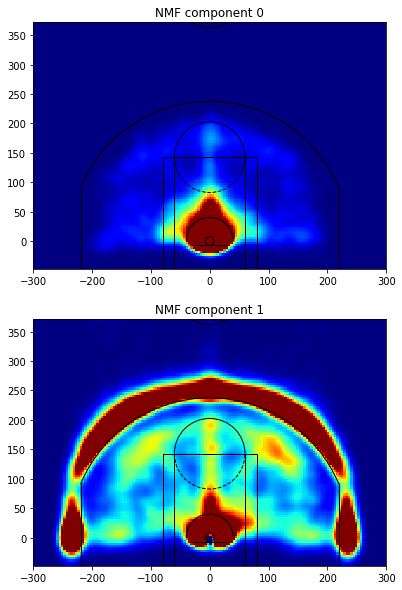

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_2[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

#### 3 Basis Vectors

In [10]:
r = 3 
W_3,H_3 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

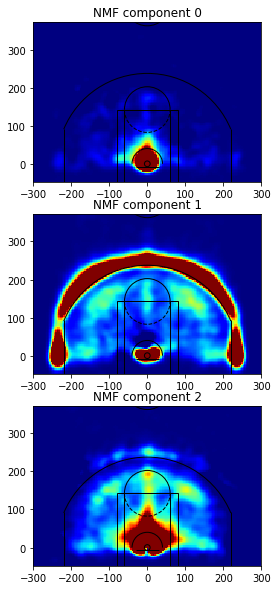

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_3[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

#### 6 Basis Vectors

In [12]:
r = 6
W_6,H_6 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

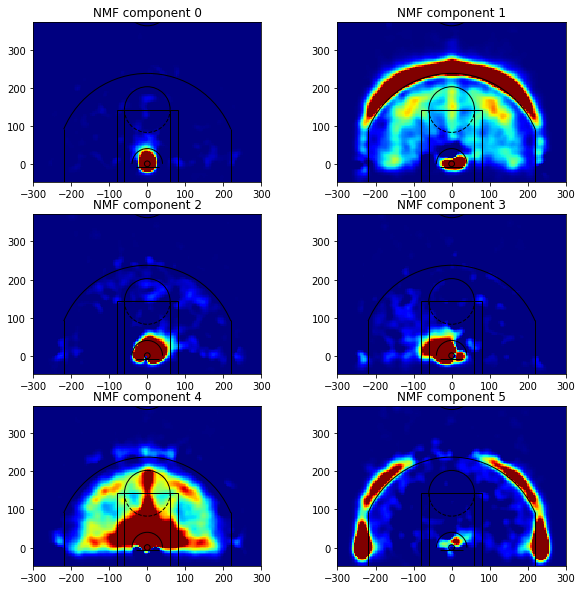

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_6[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

#### 9 Basis Vectors

In [14]:
r = 9
W_9,H_9 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

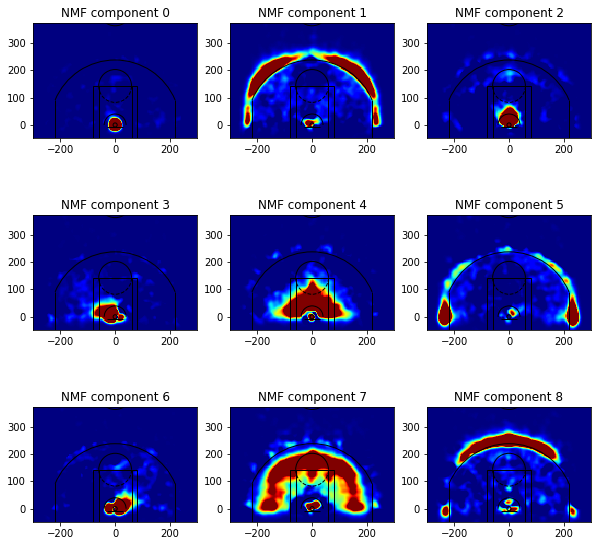

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(10,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_9[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

#### 10 Basis Vectors

In [16]:
r = 10
W_10,H_10 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

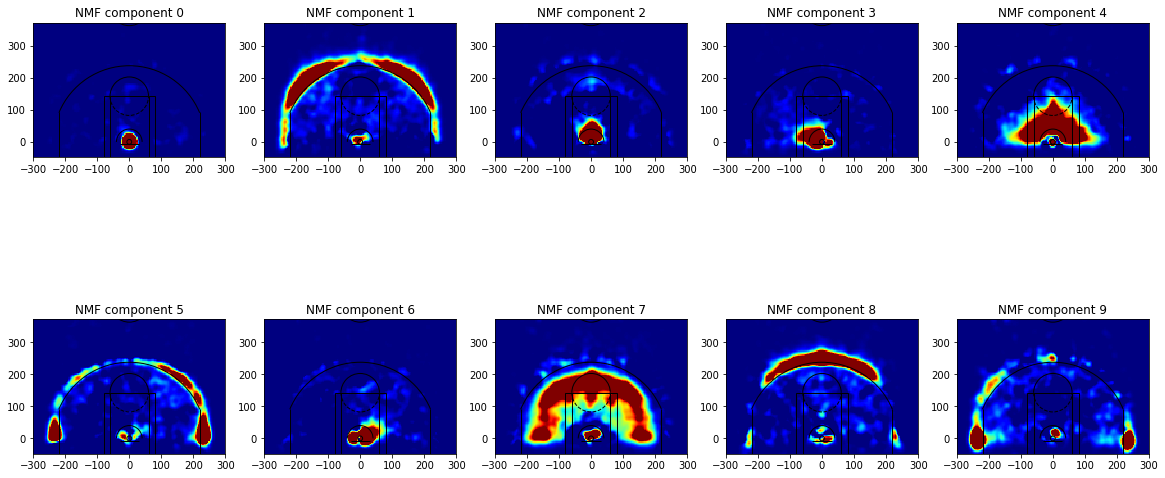

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_10[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

Based on the above plots, it seems  $2 \leq r \leq 9 $ basis vectors are appropriate to represent the shooting patterns of the players. At r=10 the basis vectors become more and more repetitive, though they represent the actual data better and better.

### Problem 1 Part 2
__PSTAT 234 (optional for 134)__: Choose two different choices for number of components, say $r_1=3$ and $r_2=20$. Reconstruct the shooting pattern of at least two player using 3 bases and 20 bases. Is there any difference between the reconstruction?

- For a given player, plot the original shooting frequencies and corresponding reconstruction for $r \in \{3,20\}$.

Compute the difference: i.e., the norm of the difference  $ \min_{W_r,H_r} \| X - W_rH_r \|_F$. Plot the approximation error as a function of $r$. (Note the subscript $r$ makes the choice of $r$ explicit.) Choose at least 10 different choices of $r$. Based on this plot, what can you say about choosing $r$?

#### r = 3 reconstruction

In [18]:
X_all = pd.DataFrame(X,columns = all_smooth.keys()) # original bin values
X_all.head()

,1713,1717,1891,1938,2037,2199,2200,2207,2210,2216,...,1627812,1627823,1627826,1627827,1627834,1627835,1627848,1627851,1627852,1627884
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_hat3 = pd.DataFrame(np.matmul(W_3,H_3), columns=all_smooth.keys()) # estimated bin values
X_hat3.head()

,1713,1717,1891,1938,2037,2199,2200,2207,2210,2216,...,1627812,1627823,1627826,1627827,1627834,1627835,1627848,1627851,1627852,1627884
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# what is the frobenius norm of the matrix decomposition? 
from numpy import linalg as LA
norm3 = LA.norm(X_all-X_hat3, 'fro')
print('The frobenius norm for r=3 is:', norm3)

The frobenius norm for r=3 is: 0.186697632847


/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Estimated Shooting Pattern (r=3) Carmelo Anthony')

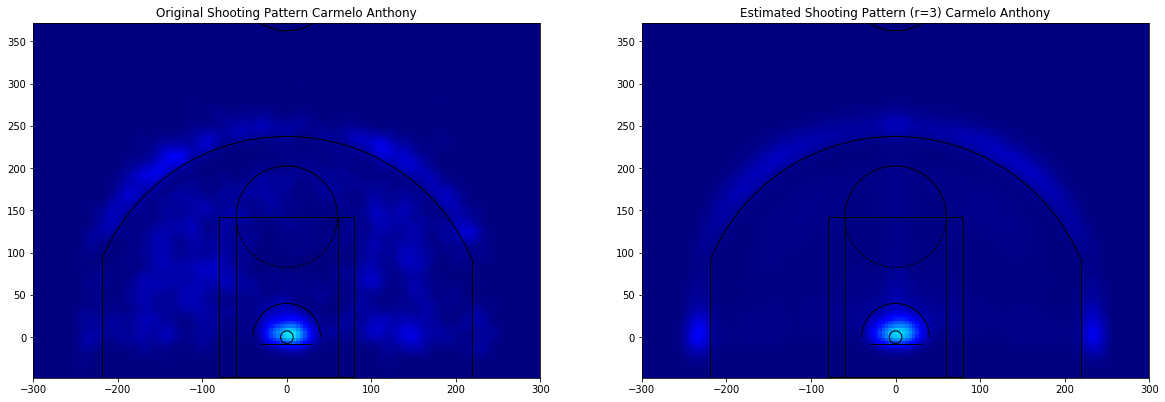

In [21]:
# Carmelo Anthony has Player ID 2546
fig, ax = plt.subplots(1,2, figsize=(20,60))
starplyrs = {2526:'Carmelo Anthony', 2544:'Lebron James'}
h.plot_shotchart(X_all[2546], xedges, yedges, ax=ax[0]) # plot actual
h.plot_shotchart(X_hat3[2546], xedges, yedges, ax=ax[1]) # plot estimated
ax[0].set_title('Original Shooting Pattern ' + starplyrs[2526])
ax[1].set_title('Estimated Shooting Pattern (r=3) ' + starplyrs[2526])

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Estimated Shooting Pattern (r=3) Lebron James')

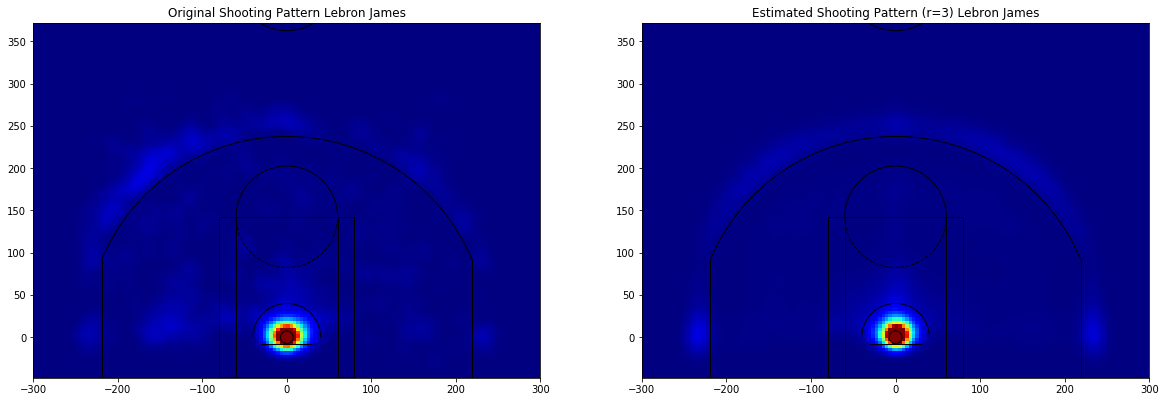

In [22]:
# Lebron James has player ID 2544
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[2544], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat3[2544], xedges, yedges, ax=ax[1])
ax[0].set_title('Original Shooting Pattern ' + starplyrs[2544])
ax[1].set_title('Estimated Shooting Pattern (r=3) ' + starplyrs[2544])

As seen above, the shooting patterns from the reconstructions are similar to the original shooting patterns for both players. 

#### r = 20 reconstruction

In [23]:
r = 20
W_20,H_20 = non_negative_matrix_decomp(n_components = r,train_data = X) # compute NMF

X_hat20 = pd.DataFrame(np.matmul(W_20,H_20), columns=all_smooth.keys()) # estimated bin values
X_hat20.head()

,1713,1717,1891,1938,2037,2199,2200,2207,2210,2216,...,1627812,1627823,1627826,1627827,1627834,1627835,1627848,1627851,1627852,1627884
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# calculate frobenius norm for r=20
norm20 = LA.norm(X_all-X_hat20,'fro')
print('The frobenius norm for r=20 is:', norm20)

The frobenius norm for r=20 is: 0.114700817826


/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Estimated Shooting Pattern (r=20) Carmelo Anthony')

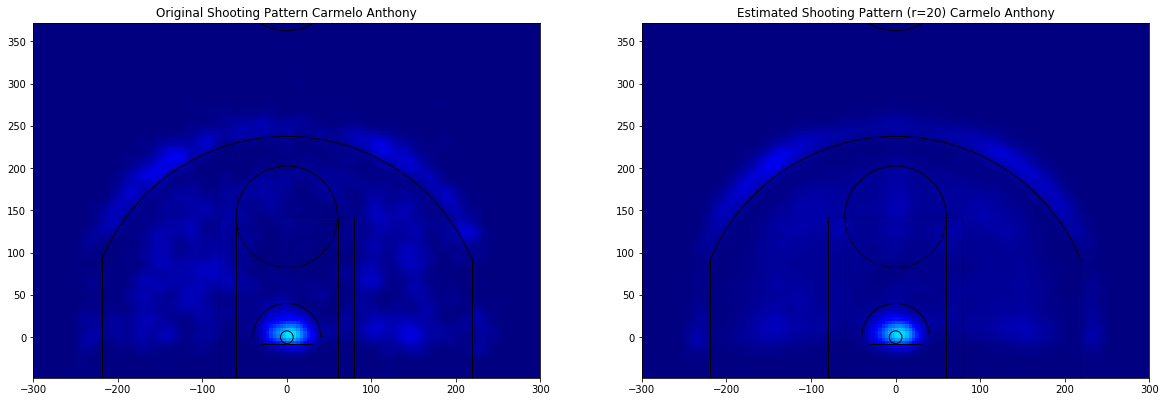

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[2546], xedges, yedges, ax=ax[0]) 
h.plot_shotchart(X_hat20[2546], xedges, yedges, ax=ax[1])
ax[0].set_title('Original Shooting Pattern ' + starplyrs[2526])
ax[1].set_title('Estimated Shooting Pattern (r=20) ' + starplyrs[2526])

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Estimated Shooting Pattern (r=20) Lebron James')

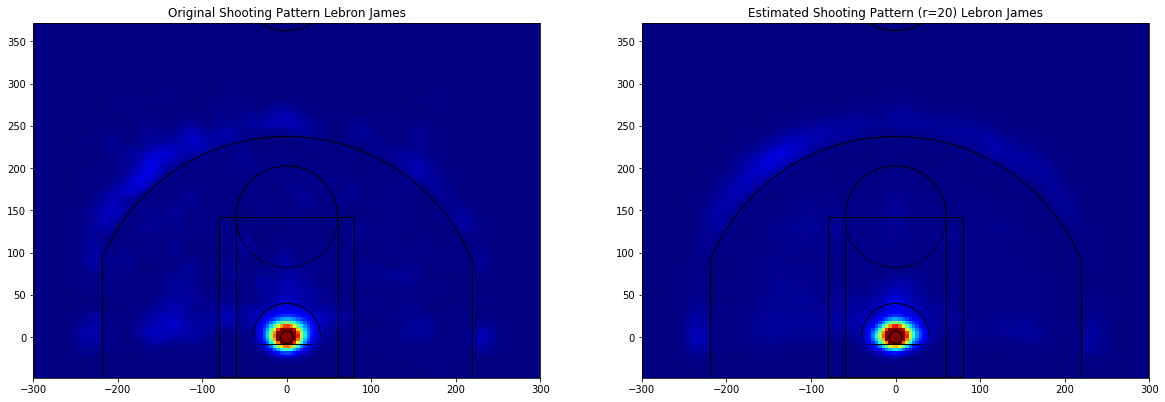

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[2544], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat20[2544], xedges, yedges, ax=ax[1])
ax[0].set_title('Original Shooting Pattern ' + starplyrs[2544])
ax[1].set_title('Estimated Shooting Pattern (r=20) ' + starplyrs[2544])

For r=20 basis vectors, the shooting pattern reconstructions better match the original shooting patterns for both players. This is expected because as r increases, the frobenius norm error rate approaches 0 and it represents the actual data better. 

Below, the error rates as NMF components increase from 1 to 10 are calculated and plotted. It can be seen that as the number of basis vectors increase, the error rate decreases.

In [27]:
from numpy import linalg as LA # To compute Frobenious norm
r_values = np.arange(10)+1
error_norm = []
for r in r_values:
    W,H = non_negative_matrix_decomp(n_components = r,train_data = X)
    error_norm.append(LA.norm(X-np.matmul(W,H),'fro'))

Text(0.5,1,'Error Rate of Basis Vectors in NMF')

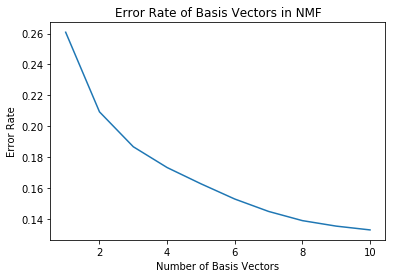

In [28]:
# plot error rate and number of basis vectors
plt.plot(r_values,error_norm)
plt.xlabel("Number of Basis Vectors")
plt.ylabel("Error Rate")
plt.title("Error Rate of Basis Vectors in NMF") 

## Problem 2 Part 1

__PSTAT 134 and 234__: In the previous question, NMF gave us a set of bases to describe each player. So, the comparison is through a standard set of shooting styles. We may also approach the comparison more directly.

* In this problem, we compare of players' shooting styles to each other directly. What we are interested in is pairwise correlation between shooting patterns. Let $X_i$ represent the column in the smoothed shooting pattern for player $i$. Then, we want to compute   
    $$ R = [\text{Cor} (X_i, X_j)]_{i,j} $$ for all player combinations $i,j\in\{1,2,\dots,362\}$. What is the correct orientation of matrix $X$? What should be the dimension of matrix $R$?   

* Visualize matrix $R$ with [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

* Identify 2 pairs of players with highest similarities (positive correlation) and 2 pairs with lowest similarity (negative correlation). Plot their shooting pattern. What do you observe?

In [29]:
# compute correlation coefficient among every player
R = pd.DataFrame(np.corrcoef(X_all, rowvar=0), columns=all_smooth.keys())
R.shape

(362, 362)

In [30]:
# make the correlation matrix into a data frame with indexes as player IDs
R['Player ID'] = all_smooth.keys()
R.set_index('Player ID', inplace=True)
R.head()

,1713,1717,1891,1938,2037,2199,2200,2207,2210,2216,...,1627812,1627823,1627826,1627827,1627834,1627835,1627848,1627851,1627852,1627884
Player ID,,,,,,,,,,,,,,,,,,,,,
1713,1.000000,0.488401,0.617234,0.803150,0.662893,0.730724,0.740852,0.639996,0.800058,0.678943,...,0.842236,0.852197,0.703233,0.797299,0.640077,0.772678,0.755387,0.853327,0.686274,0.721798
1717,0.488401,1.000000,0.245892,0.482609,0.506037,0.335005,0.524601,0.389769,0.367817,0.423062,...,0.618873,0.406635,0.357664,0.400655,0.332014,0.426051,0.407694,0.400603,0.364996,0.354068
1891,0.617234,0.245892,1.000000,0.558041,0.450947,0.447223,0.480142,0.573281,0.692908,0.403079,...,0.504845,0.587099,0.406536,0.693507,0.389672,0.664009,0.450521,0.566940,0.551384,0.453848
1938,0.803150,0.482609,0.558041,1.000000,0.497121,0.657963,0.745981,0.575667,0.717525,0.740014,...,0.817828,0.859409,0.706397,0.748787,0.638338,0.793545,0.704532,0.820058,0.605358,0.682904
2037,0.662893,0.506037,0.450947,0.497121,1.000000,0.486768,0.627193,0.660290,0.495879,0.556740,...,0.661086,0.567661,0.540122,0.525109,0.469346,0.571711,0.507663,0.576702,0.484752,0.449747


The matrix X_all columns represent each player. Thus, when computing the correlation, rowvar=0 needs to be specified to compute column-wise correlations. The dimensions of the resultant matrix R is a 362x362 square matrix, with 1s in the diagonal. The only relevent information are the covariances between players in the upper triangular or lower triangular part of the matrix (they are identical). 

Text(0.5,1,'Correlation Among Basketball Players')

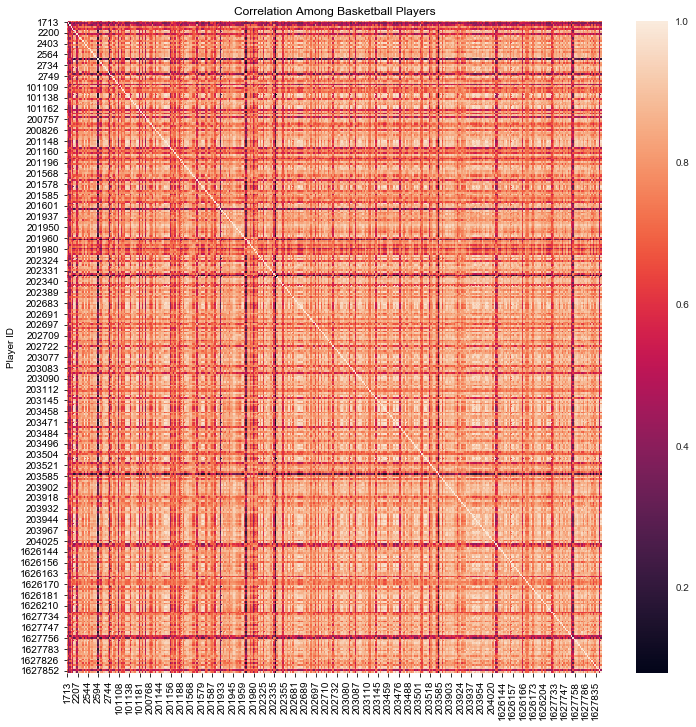

In [31]:
# visualize correlation matrix with seaborn package
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,12))
sns.set()
sns.heatmap(R, ax=ax)
plt.title("Correlation Among Basketball Players")

In [32]:
R.min().min() # find smallest value in R

0.078895516904662427

In [33]:
R.min().where(R.min() <=0.09).dropna() # since this matrix is symmetrical, these are two pairs of minimum values

2594      0.081817
2733      0.078896
2744      0.081817
203584    0.078896
dtype: float64

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Shooting Pattern for Al Jefferson')

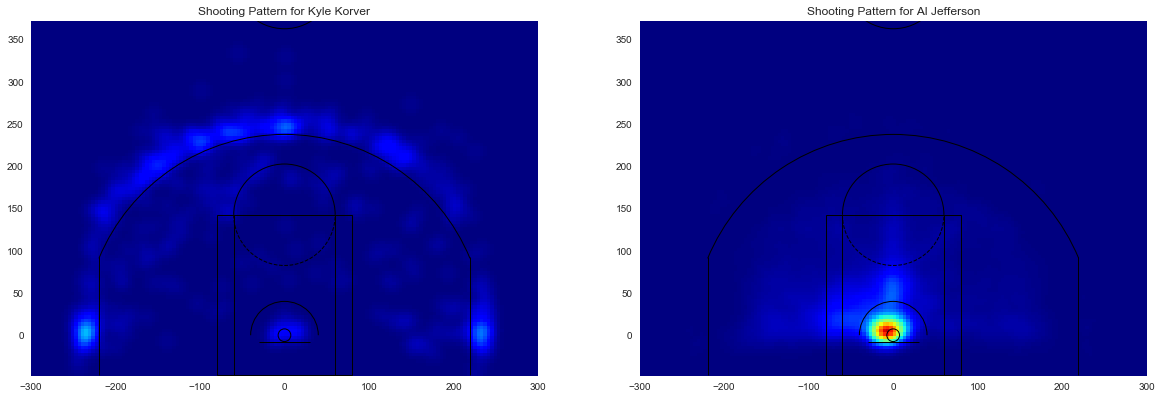

In [34]:
# 2594 is Kyle Korver, 2744 is Al Jefferson, lowest correlation
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[2594], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat20[2744], xedges, yedges, ax=ax[1])
ax[0].set_title('Shooting Pattern for Kyle Korver')
ax[1].set_title('Shooting Pattern for Al Jefferson')

As seen above, these two players have a very low correlation. This is most likely because of the players' positions in the game. Kyle Korver is a shooting guard and thus is typically shooting three pointers, while Al Jefferson is a center and is primarily under the hoop. 

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Shooting Pattern for Troy Daniels')

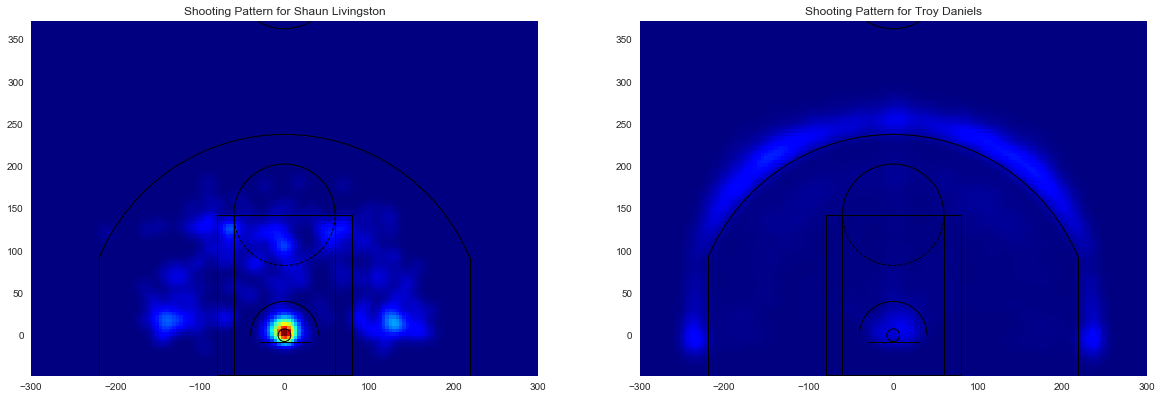

In [35]:
# 2733 is Shaun Livingston, 203584 is Troy Daniels, lowest correlation
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[2733], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat20[203584], xedges, yedges, ax=ax[1])
ax[0].set_title('Shooting Pattern for Shaun Livingston')
ax[1].set_title('Shooting Pattern for Troy Daniels')

As seen above, these two players also have a very low correlation. Shaun Livingston is a point guard and thus is typically dribbling down the court and shooting close to the basket, while Troy Daniels is a shooting guard and is primarily shooting three pointers. 

In [36]:
# since 1 is on the diagonal, and is the max for each column and row, 
# we need to remove this 1 from each diag to find highest correlations among players
Rmax = R.copy()
np.fill_diagonal(Rmax.values,None)

In [37]:
Rmax.max().max()


0.99667799324460871

In [38]:
Rmax.max().where(Rmax.max() >= 0.99588).dropna() # these are two pairs of high correlations between players

201599    0.995883
203497    0.996678
203512    0.995883
203991    0.996678
dtype: float64

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Shooting Pattern for Lucas Nogueira')

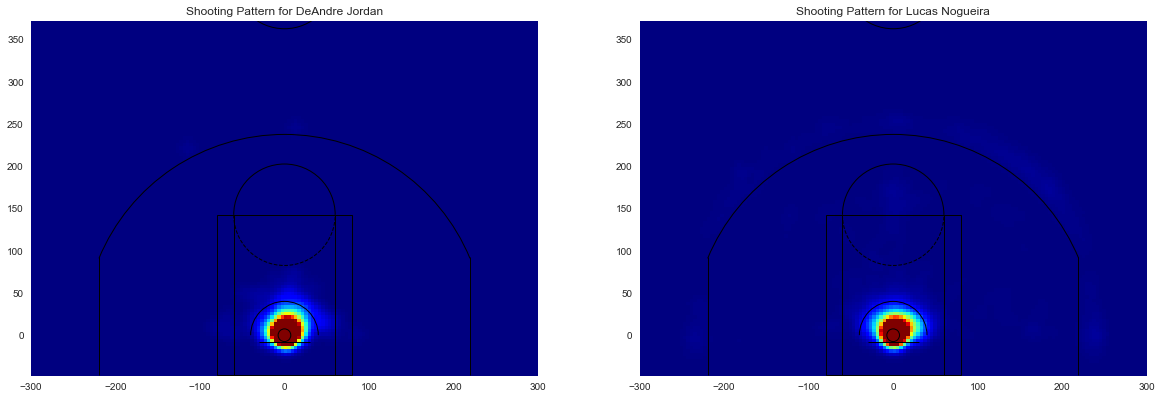

In [39]:
# 201599 is DeAndre Jordan, 203512 is Lucas Nogueira
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[201599], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat20[203512], xedges, yedges, ax=ax[1])
ax[0].set_title('Shooting Pattern for DeAndre Jordan')
ax[1].set_title('Shooting Pattern for Lucas Nogueira')

As seen above, these two players have a highly correlated shooting pattern. DeAndre Jordan is a center and Lucas Noguiera is a power forward, which is a very similar position to center. Both are primarily under the basket when they shoot. 

/Users/benfox/Spring-2018/helper_basketball.py:174: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  counts = hist_counts.reshape((nx, ny))


Text(0.5,1,'Shooting Pattern for Clint Capela')

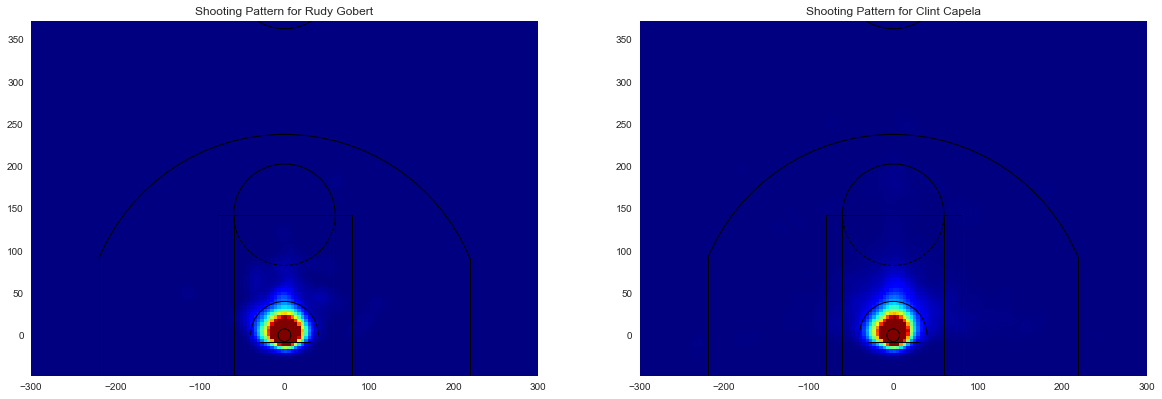

In [40]:
# 203497 is Rudy Gobert, 203991 is Clint Capela
fig, ax = plt.subplots(1,2, figsize=(20,60))
h.plot_shotchart(X_all[203497], xedges, yedges, ax=ax[0])
h.plot_shotchart(X_hat20[203991], xedges, yedges, ax=ax[1])
ax[0].set_title('Shooting Pattern for Rudy Gobert')
ax[1].set_title('Shooting Pattern for Clint Capela')

As seen above, these two players have a highly correlated shooting pattern. Rudy Gobert is a center and Clint Capela is also a center. Thus, there shooting patterns are primarily under the basket.

## Problem 2 Part 2
__PSTAT 234 (optional for 134)__: Perform hierarchical clustering with matrix $R$, and visualize the clustered matrix.

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [42]:
Z = linkage(X_all.T,method='complete',metric='correlation') # HCA using complete linkage method, transpose so samples are in rows

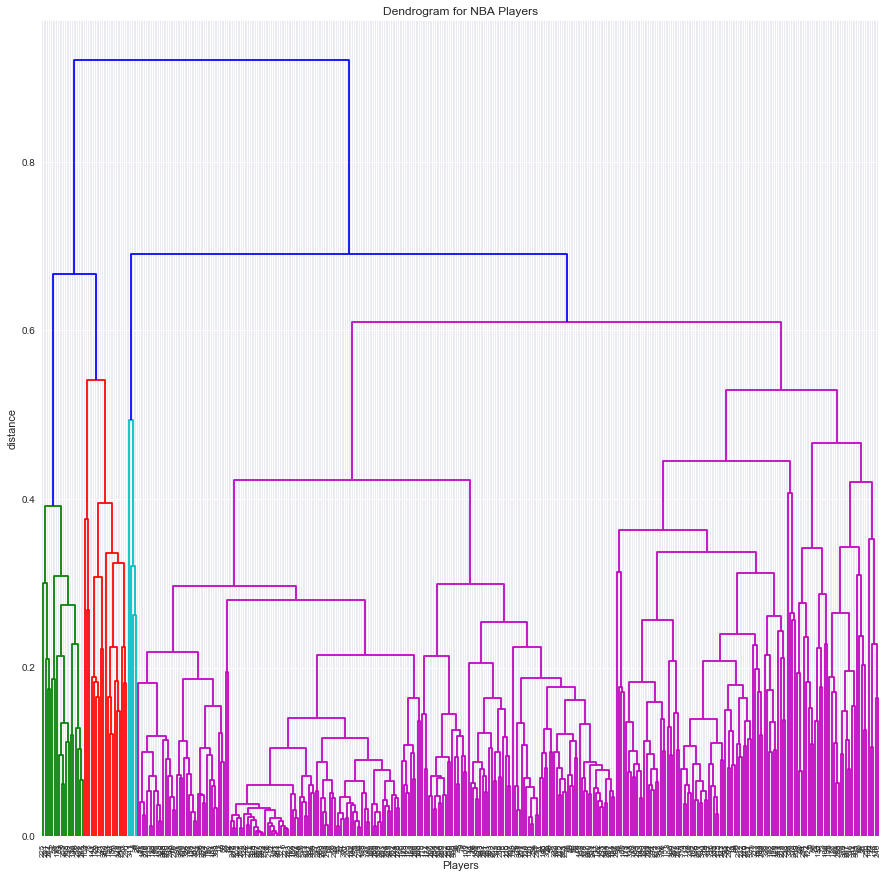

In [43]:
plt.figure(figsize=(15,15))
plt.title('Dendrogram for NBA Players')
plt.xlabel('Players')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

The dendrogram clustered the players as seen above. The dendrogram automatically cuts the tree at 70% the final merge, hence the different clusters. Ideally, this dendrogram would be cut at 5 clusters (the number of positions in basketball), which is done below in Problem 3.

## Problem 3

__PSTAT 134 and 234__: How would you use the coefficients matrix $H$ from NMF  or the correlation matrix $R$ (computed above) to differentiate between types of players? Consider what the coefficients represent, and how you can use them to discriminate player types.

Give your thought process, reasoning for your chosen method, and the results. Do they look reasonable? Do you expect any of the comparison to be similar to any of the [figures here](https://fastbreakdata.com/classifying-the-modern-nba-player-with-machine-learning-539da03bb824)? Why, or why not? Can you verify your intuition?

In NMF, the $W$ matrix is an pxr matrix with each column being a shooting pattern. Each cell within each column has a value indicating the importance of that particular bin in the feature. In the $H$ matrix, which is rxn (n being the number of players), each column corresponds to a player and each cell value corresponds to a weight for each feature, r, for that player.

The coefficients matrix $H$ from NMF has 362 columns (the number of players currently being analyzed). Each column in this matrix specifies a weight for each feature (shooting style) specified in matrix $W$ for each player. Thus, the matrix $H$ from NMF can explain which shooting styles are used per player, which in turn could help discover what position each player plays. The $H$ matrix could be clustered using hierarchical clustering to find players with similar weights for shooting patterns. This is done below.

Additionally, the correlation matrix $R$ can be used to differentiate the types of players through hierarchical clustering because players of the same position would theoretically be highly correlated. This is also performed below.

First, lets visualize the hierarchical dendrogram above with 5 clusters, which is the number of positions in basketball. I chose an arbitrary distance to cut the dendrogram tree to give five clusters. Below, one can see the 5 clusters and corresponding player IDs. Ideally, players in similar clusters would play similar positions.

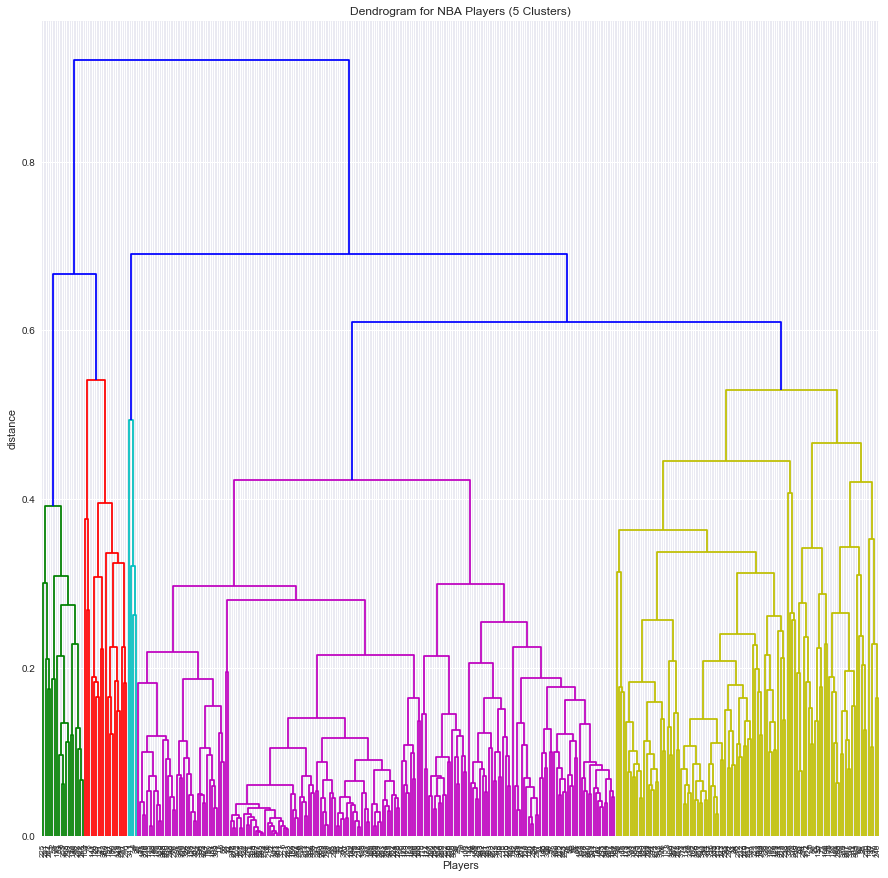

In [44]:
plt.figure(figsize=(15,15))
plt.title('Dendrogram for NBA Players (5 Clusters)')
plt.xlabel('Players')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold = 0.59 # cut tree
)
plt.show()

In [45]:
# cluster correlation heatmap, 5 clusters max since 5 positions on bball team
from scipy.cluster.hierarchy import fcluster
no_max_clust = 5
cluster_id = fcluster(Z,no_max_clust,criterion='maxclust')
cluster_id = pd.Series(cluster_id, index=X_all.T.index)
cluster_id.head() # cluster ID and cluster assignment series

1713    5
1717    3
1891    1
1938    5
2037    3
dtype: int32

In [46]:
# redo clustering of correlation matrix with sorted dataframe
Rclust = pd.DataFrame(np.corrcoef(X_all[cluster_id.sort_values().index].T), columns=cluster_id.sort_values().index)
Rclust['Player ID'] = cluster_id.sort_values().index
Rclust.set_index('Player ID', inplace=True)
Rclust.head()

,203922,204060,200782,203918,201567,201575,203585,203503,101139,201967,...,201586,203516,203521,203524,201584,203546,203552,201583,201935,1713
Player ID,,,,,,,,,,,,,,,,,,,,,
203922,1.000000,0.659189,0.876312,0.714206,0.868137,0.817775,0.896557,0.841832,0.798908,0.933562,...,0.719969,0.867681,0.709722,0.857254,0.856131,0.775197,0.743140,0.706216,0.660346,0.774448
204060,0.659189,1.000000,0.653307,0.790114,0.760018,0.704720,0.694595,0.773194,0.784701,0.722192,...,0.548816,0.695701,0.629926,0.798371,0.756211,0.619392,0.702310,0.641476,0.723407,0.698609
200782,0.876312,0.653307,1.000000,0.704877,0.790477,0.764705,0.871164,0.790186,0.771562,0.877412,...,0.646157,0.838556,0.678436,0.809375,0.818218,0.761579,0.737247,0.645702,0.614995,0.725414
203918,0.714206,0.790114,0.704877,1.000000,0.807131,0.675680,0.770424,0.764842,0.813492,0.726368,...,0.755944,0.707402,0.778112,0.795269,0.799403,0.703393,0.828085,0.730382,0.770176,0.815007
201567,0.868137,0.760018,0.790477,0.807131,1.000000,0.764157,0.871021,0.879585,0.814131,0.852766,...,0.815222,0.887272,0.807587,0.899651,0.902842,0.802622,0.743978,0.757186,0.803050,0.833513


Text(0.5,1,'Correlation Among Basketball Players w/ Clustering')

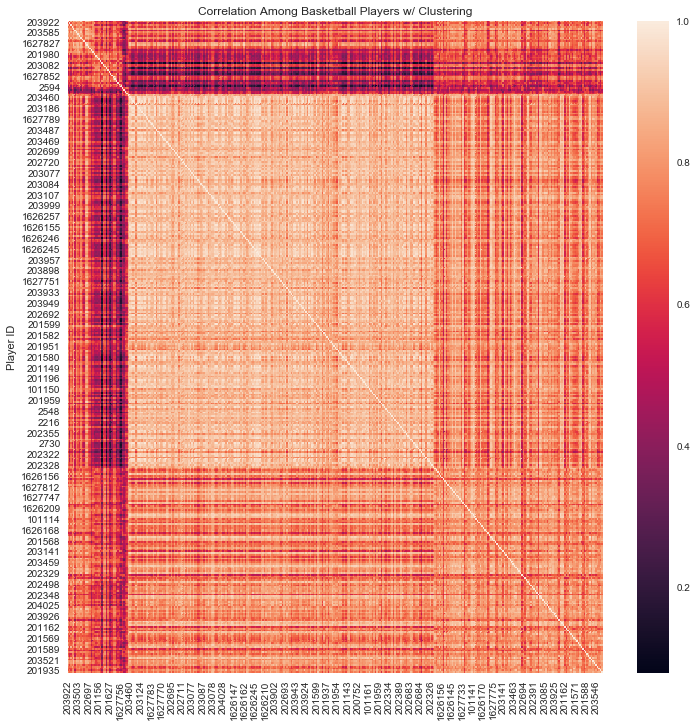

In [47]:
# replot sorted correlation heat map
fig,ax = plt.subplots(figsize=(12,12))
sns.set()
sns.heatmap(Rclust, ax=ax)
plt.title("Correlation Among Basketball Players w/ Clustering")

Above, the correlation matrix was plotted again, with the players clustered based on their correlations to each other.  This is a reasonable method to determine the position of the player. If the positions of the players were known, they could be compared to the clusters to see the accuracy of the hierarchical clustering technique. 

Next, the $H$ matrix of NMF (for r=3) is used to cluster the players.

In [48]:
h3link = linkage(H_3.T,method='complete',metric='correlation') # complete linkage method

In [49]:
# cluster correlation heatmap, 5 positions in basketball thus 5 clusters
from scipy.cluster.hierarchy import fcluster
no_max_clust = 5
h3id = fcluster(h3link,no_max_clust,criterion='maxclust')
h3id

array([1, 1, 2, 1, 3, 5, 5, 1, 2, 4, 3, 2, 5, 1, 5, 1, 4, 4, 3, 3, 4, 1, 5,
       5, 1, 2, 2, 5, 4, 1, 3, 4, 5, 2, 2, 1, 3, 2, 1, 1, 5, 5, 5, 1, 2, 3,
       3, 5, 5, 1, 5, 1, 5, 1, 5, 3, 3, 1, 3, 4, 1, 5, 5, 3, 3, 5, 5, 5, 5,
       4, 1, 1, 2, 1, 5, 3, 1, 3, 5, 1, 5, 4, 5, 2, 2, 1, 1, 3, 2, 4, 2, 5,
       5, 5, 1, 2, 4, 1, 2, 3, 1, 5, 5, 3, 1, 4, 1, 3, 2, 1, 3, 2, 2, 4, 3,
       3, 3, 3, 4, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 3, 5, 2, 4, 5, 2, 2,
       1, 5, 1, 1, 5, 3, 2, 4, 1, 5, 2, 4, 5, 3, 5, 3, 5, 2, 5, 5, 5, 5, 3,
       2, 1, 3, 5, 2, 2, 4, 2, 2, 3, 4, 1, 5, 3, 4, 2, 3, 1, 2, 2, 4, 5, 3,
       2, 5, 5, 2, 3, 5, 4, 2, 5, 5, 3, 1, 2, 5, 5, 5, 3, 4, 2, 5, 2, 2, 3,
       2, 5, 2, 2, 5, 2, 5, 5, 5, 5, 1, 5, 1, 3, 5, 4, 5, 5, 1, 4, 5, 2, 5,
       3, 2, 2, 2, 2, 5, 5, 5, 2, 2, 1, 2, 5, 5, 5, 1, 1, 2, 5, 3, 1, 1, 2,
       5, 1, 2, 3, 4, 5, 3, 5, 5, 3, 2, 1, 2, 2, 1, 1, 3, 5, 4, 1, 5, 5, 5,
       4, 5, 5, 5, 5, 3, 4, 5, 4, 4, 2, 2, 3, 5, 1, 1, 4, 4, 3, 1, 2, 5, 1,
       5, 1,

Text(0,0.5,'Feature 2')

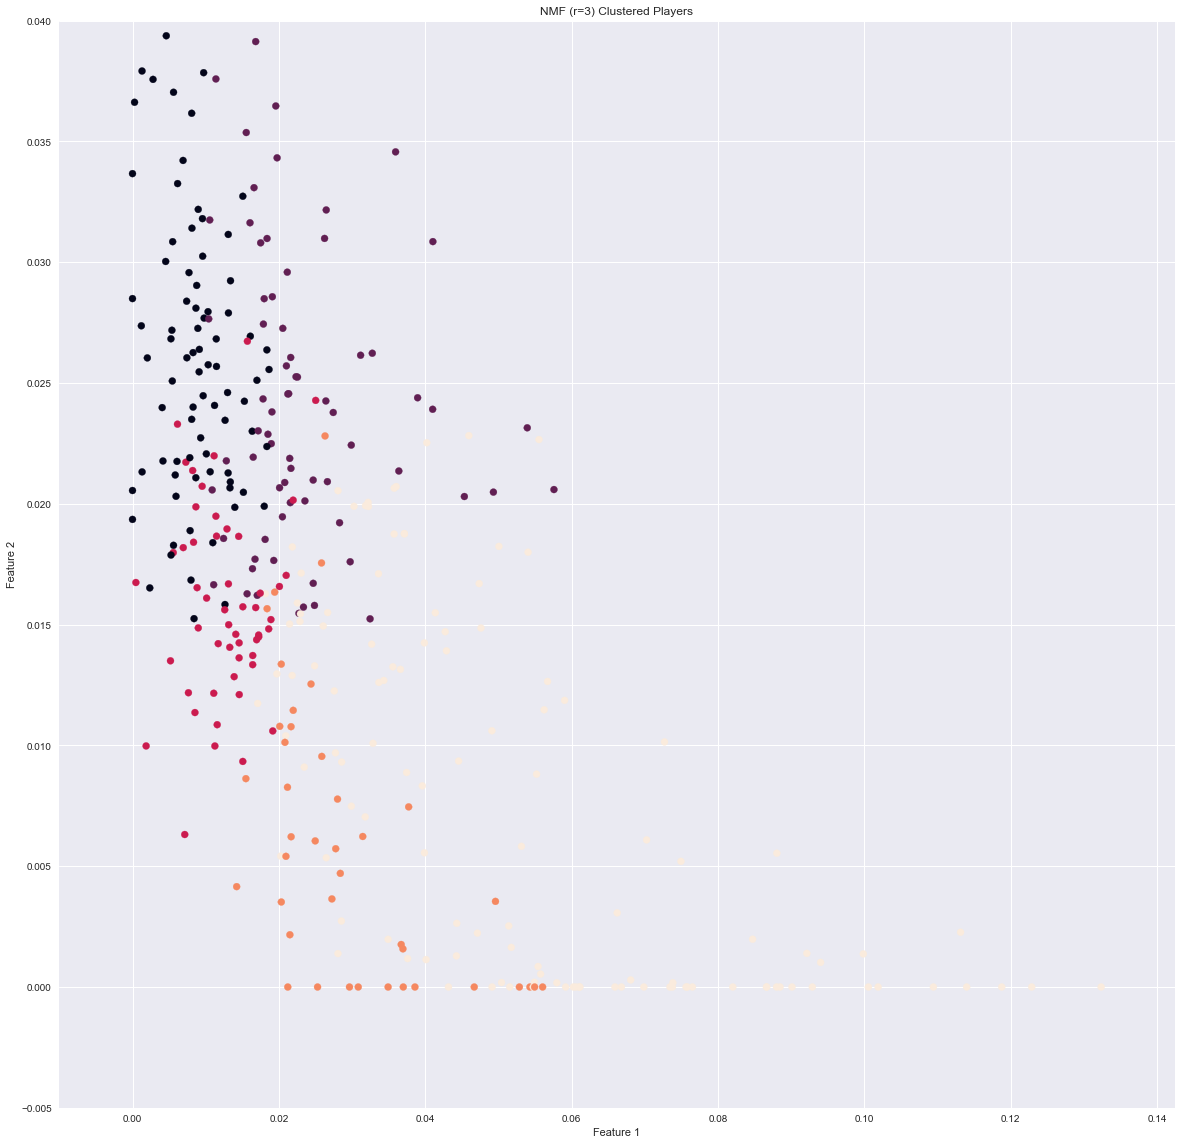

In [50]:
# plot feature 1 and feature 2 and assign clusters for each player
plt.figure(figsize=(20,20))
plt.scatter(H_3[0],H_3[1], c=h3id)
plt.ylim(-0.005,0.04)
plt.title('NMF (r=3) Clustered Players')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Recall that the shooting styles for r=3 are:

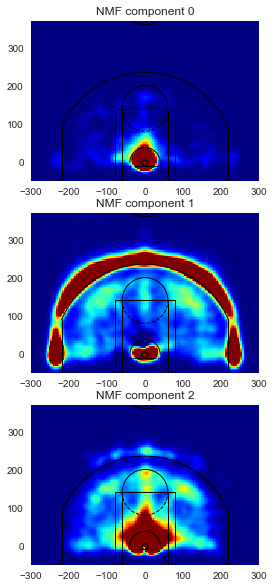

In [51]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W_3[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

Thus, comparing the first features versus the second could give insight into which players are playing which position since centers, are primarily under the basket (corresponding to feature 1), shooting guards are at the three point line (corresponding more to feature 2), etc. This could be done using more components to distinguish the players. 

We can also perform hierarchical clustering on the $H$ matrix and cut the dendrogram at 5 clusters. This could also reveal the players positions.

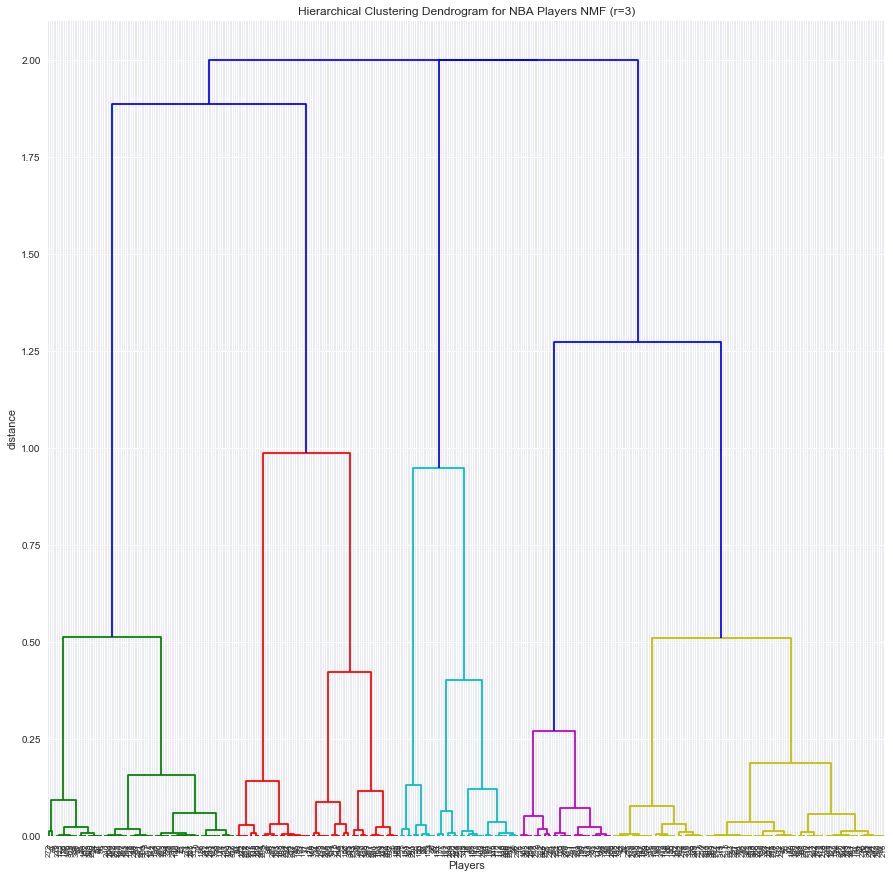

In [52]:
plt.figure(figsize=(15,15))
plt.title('Hierarchical Clustering Dendrogram for NBA Players NMF (r=3)')
plt.xlabel('Players')
plt.ylabel('distance')
dendrogram(h3link, leaf_rotation=90.,leaf_font_size=8.,color_threshold=1 )
plt.show()

Clearly, many methods can be used to determine the positions fo the players without actually knowing the players' positions.

## Problem 4

__PSTAT 134 and 234__: Suppose you are in charge of a basketball team. How would you use this information? How would you use what you have learned from analyzing the data, and what other questions would you like to answer with further analysis.

Many insights can be drawn from this information. If I were the coach of a basketball team, insights on opponents' players could be found. For example, their shooting patterns, where they shoot from, the probability they make a particular shot, and more could be used to inform my team on how to play defense, which opponents to keep an eye on, and which opponents to not worry about. Furthermore, the characteristics of great players could be analyzed to determine what makes a high scoring basketball player. With additional analysis, I would like to determine the correlation between making a shot and whether or not a player was being defended, the most likely place to make a three point shot from, and where the most missed shot is taken from. 

Overall, a significant number of analyses can be done on this data and many interesting insights can be drawn; it is only a matter of thinking of interesting and relevent hypotheses to test. 